<a href="https://colab.research.google.com/github/wang201156/CFD_program/blob/main/gauss_seidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grid: 5x5
Number of iterations: 27
Value of final: 0.0009044483417868336
Max Error: 0.00233


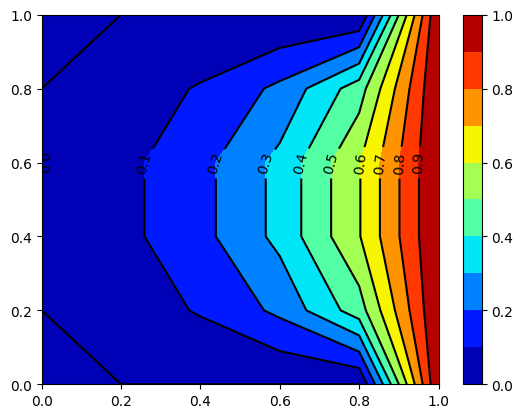

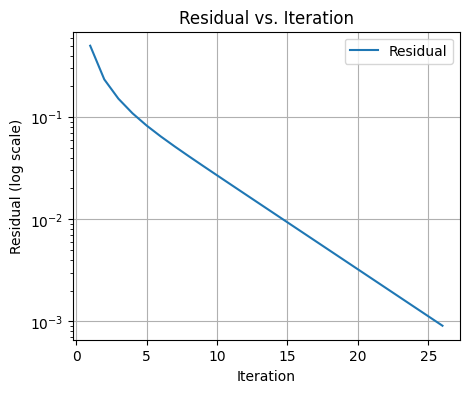

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 設定網格參數
nx, ny = 6, 6
xmax, xmin = 1.0, 0.0
ymax, ymin = 1.0, 0.0
tol = 1e-3
pi = np.pi

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# 初始化矩陣
T =  np.zeros((nx, ny))
TEMP = np.zeros((nx, ny))
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, np.flipud(y))

# 設定邊界條件
T[-1, :] = 0   # 底部邊界 T = 0
T[0, :] = 0  # 頂部邊界 T = 0
T[:, 0] = 0   # 左側邊界 T = 0
T[:, -1] = 1  # 右側邊界 T = 1

# 計算 TEMP (理論解)
for i in range(nx):
    for j in range(ny):
        for k in range(1, 226, 2):
            sinhy = np.sinh(k * pi * y[j]) / np.sinh(k * pi)
            sinx = np.sin(k * pi * x[i])
            TEMP[i, j] += (2 / k) * sinx * sinhy
        TEMP[i, j] *= (2 / pi)

#=======================================================================================
# 迭代求解


# Guess array for comparison
Tg = T.copy()
error = 1
count = 1
residuals = []

#neighbors coefficient and central coefficient.

aw = 1.0 / (dx**2)
ae = 1.0 / (dx**2)
as_ = 1.0 / (dy**2)
an = 1.0 / (dy**2)
ap = 2.0 * (1.0 / dx**2 + 1.0 / dy**2)

while error > tol:

    T_new = T.copy() # Copying T to store previous values


    for i in range(1, nx - 1):  # Gauss-Seidel Iteration
        for j in range(1, ny - 1):
            T[i, j] = ( aw * T_new[i-1, j] + ae * T[i+1, j] + as_ * T_new[i, j-1] + an * T[i, j+1]  ) / ap


    error = np.sqrt(np.sum((T - Tg)**2))  # Evaluating error
    residuals.append(error)

    Tg = T.copy() # Updating guess for next iteration


    count += 1    # Incrementing counter

#=======================================================================================
#The maximum error observed versus mesh size
nu_th_error=[]
for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            nu_th_error=np.abs(T[i,j] - TEMP[i,j])
max_error=np.max(nu_th_error)

#=======================================================================================
#Show results

#Simulation stats
print(f'Grid: {nx-1}x{ny-1}')
print('Number of iterations:', count)
print('Value of final:', error)
print(f'Max Error: {max_error:.5f}')

# Result Plotting (Temperature contour plot)
plt.figure(3, dpi=100)
cp1 = plt.contourf(X, Y, T, 10, cmap='jet')
plt.colorbar()
cp1 = plt.contour(X, Y, T, 10, colors='k')
plt.clabel(cp1, inline=True, fontsize=10)
plt.show()

# residual plot
plt.figure(figsize=(5, 4))
plt.semilogy(range(1, len(residuals) + 1), residuals, label="Residual")
plt.xlabel("Iteration")
plt.ylabel("Residual (log scale)")
plt.title("Residual vs. Iteration")
plt.legend()
plt.grid()
plt.show()

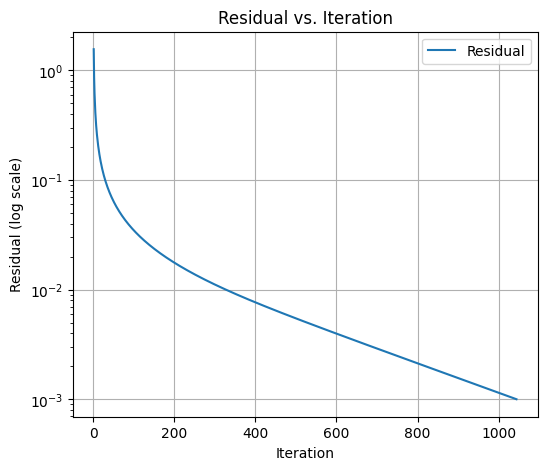

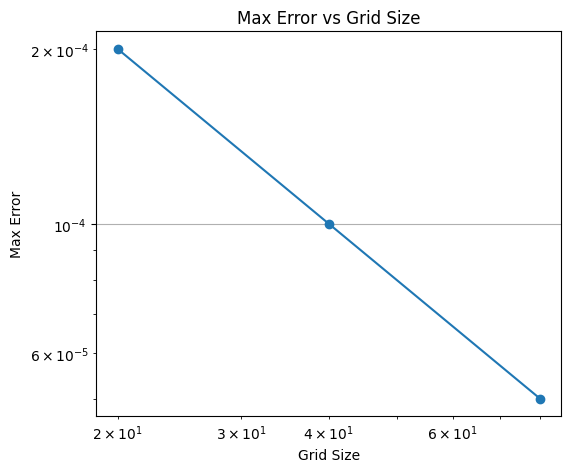

In [ ]:
# Solve for different grid sizes
grids = [20, 40, 80]
max_errors=[0.00020,0.00010,0.00005]
# Plot max error vs grid size
plt.figure(figsize=(6, 5))
plt.loglog(grids, max_errors, marker='o')
plt.xlabel('Grid Size')
plt.ylabel('Max Error')
plt.title('Max Error vs Grid Size')
plt.grid()
plt.show()

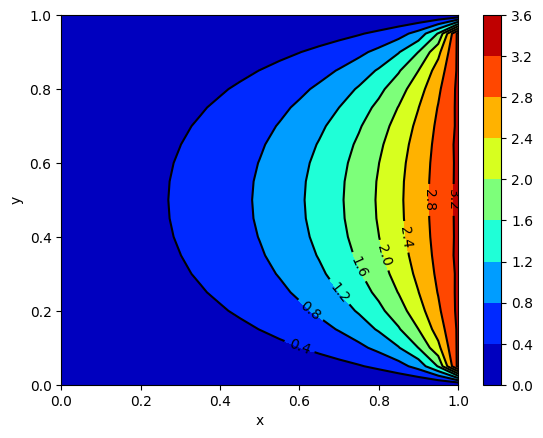

In [ ]:
#TEMP[-1, :] = 0   # 底部邊界 T = 0
#TEMP[0, :] = 1  # 頂部邊界 T = 1
#TEMP[:, 0] = 0   # 左側邊界 T = 0
#TEMP[:, -1] = 0  # 右側邊界 T = 0
for i in range(nx):
    for j in range(ny):
        for k in range(1, 226, 2):
            sinhy = np.sinh(k * pi * y[j]) / np.sinh(k * pi)
            sinx = np.sin(k * pi * x[i])
            TEMP[j, i] += (2 / k) * sinx * sinhy
        TEMP[i, j] *= (2 / pi)



plt.figure(3, dpi=100)
plt.xlabel("x")
plt.ylabel("y")
cp1 = plt.contourf(X, Y, TEMP, 10, cmap='jet')
plt.colorbar()
cp1 = plt.contour(X, Y, TEMP, 10, colors='k')
plt.clabel(cp1, inline=True, fontsize=10)
plt.show()



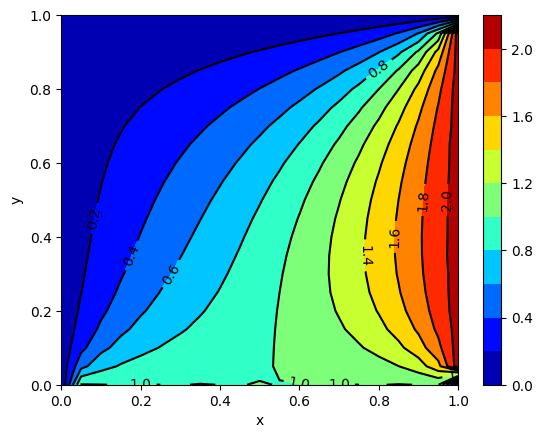

In [ ]:
for i in range(nx):
    for j in range(ny):
        for k in range(1, 226, 2):
            sinhy = np.sinh(k * pi * (y[j])) / np.sinh(k * pi)
            sinx = np.sin(k * pi * x[i])
            TEMP[j, i] += (2 / k) * sinx * sinhy
        TEMP[i, j] *= (2 / pi)

# 繪製結果
plt.figure(3, dpi=100)
plt.xlabel("x")
plt.ylabel("y")
cp1 = plt.contourf(X, Y, TEMP, 10, cmap='jet')
plt.colorbar()
cp1 = plt.contour(X, Y, TEMP, 10, colors='k')
plt.clabel(cp1, inline=True, fontsize=10)
plt.show()